In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute
import pandas_datareader.data as web

    
from sklearn.linear_model import LinearRegression

In [2]:

df = web.DataReader("AAPL", 'stooq')["High"]
df

Date
2020-11-06    119.200
2020-11-05    119.410
2020-11-04    115.390
2020-11-03    111.300
2020-11-02    110.490
               ...   
2015-11-13     26.766
2015-11-12     27.058
2015-11-11     27.188
2015-11-10     27.348
2015-11-09     28.216
Name: High, Length: 1259, dtype: float64

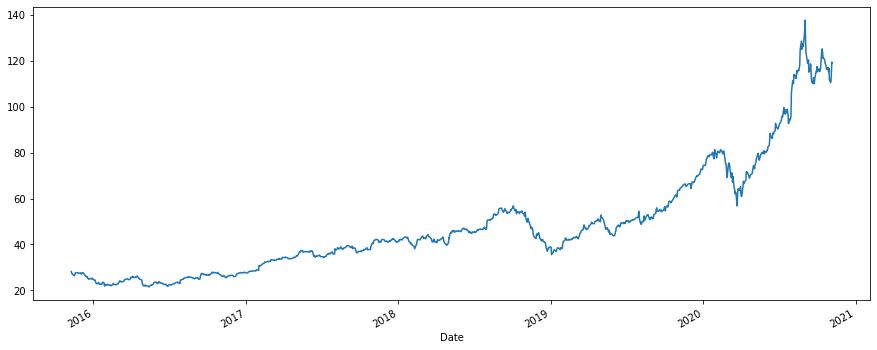

In [3]:
plt.figure(figsize=(15, 6))
df.plot(ax=plt.gca())
plt.show()


In [4]:
df_melted = pd.DataFrame({"high": df.copy()})
df_melted["date"] = df_melted.index
df_melted["Symbols"] = "AAPL"

df_melted

,high,date,Symbols
Date,,,
2020-11-06,119.200,2020-11-06,AAPL
2020-11-05,119.410,2020-11-05,AAPL
2020-11-04,115.390,2020-11-04,AAPL
2020-11-03,111.300,2020-11-03,AAPL
2020-11-02,110.490,2020-11-02,AAPL
...,...,...,...
2015-11-13,26.766,2015-11-13,AAPL
2015-11-12,27.058,2015-11-12,AAPL
2015-11-11,27.188,2015-11-11,AAPL


In [5]:
df_rolled = roll_time_series(df_melted, column_id="Symbols", column_sort="date",
                             max_timeshift=20, min_timeshift=5)

/home/ashutosh/miniconda3/lib/python3.7/site-packages/tsfresh/utilities/dataframe_functions.py:454: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn("Your time stamps are not uniformly sampled, which makes rolling "
Rolling: 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]


In [6]:
df_rolled

,high,date,Symbols,id
0,28.216,2015-11-09,AAPL,"(AAPL, 2015-11-16 00:00:00)"
1,27.348,2015-11-10,AAPL,"(AAPL, 2015-11-16 00:00:00)"
2,27.188,2015-11-11,AAPL,"(AAPL, 2015-11-16 00:00:00)"
3,27.058,2015-11-12,AAPL,"(AAPL, 2015-11-16 00:00:00)"
4,26.766,2015-11-13,AAPL,"(AAPL, 2015-11-16 00:00:00)"
...,...,...,...,...
26209,110.490,2020-11-02,AAPL,"(AAPL, 2020-11-06 00:00:00)"
26210,111.300,2020-11-03,AAPL,"(AAPL, 2020-11-06 00:00:00)"
26211,115.390,2020-11-04,AAPL,"(AAPL, 2020-11-06 00:00:00)"
26212,119.410,2020-11-05,AAPL,"(AAPL, 2020-11-06 00:00:00)"


In [7]:
df_rolled[df_rolled["id"] == ("AAPL", pd.to_datetime("2020-07-14"))]

,high,date,Symbols,id
24471,86.116,2020-06-15,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24472,87.988,2020-06-16,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24473,88.537,2020-06-17,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24474,88.050,2020-06-18,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24475,88.827,2020-06-19,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24476,89.548,2020-06-22,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24477,92.768,2020-06-23,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24478,91.873,2020-06-24,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24479,90.928,2020-06-25,AAPL,"(AAPL, 2020-07-14 00:00:00)"
24480,91.008,2020-06-26,AAPL,"(AAPL, 2020-07-14 00:00:00)"


In [8]:
df_melted[(df_melted["date"] <= pd.to_datetime("2020-07-14")) & 
          (df_melted["date"] >= pd.to_datetime("2020-06-15")) & 
          (df_melted["Symbols"] == "AAPL")]


,high,date,Symbols
Date,,,
2020-07-14,96.913,2020-07-14,AAPL
2020-07-13,99.610,2020-07-13,AAPL
2020-07-10,95.643,2020-07-10,AAPL
2020-07-09,95.979,2020-07-09,AAPL
2020-07-08,95.038,2020-07-08,AAPL
2020-07-07,94.322,2020-07-07,AAPL
2020-07-06,93.613,2020-07-06,AAPL
2020-07-02,92.291,2020-07-02,AAPL
2020-07-01,91.517,2020-07-01,AAPL


In [9]:
len(df_melted)

1259

In [10]:
df_rolled["id"].nunique()

1254

In [11]:
df_rolled.groupby("id").size().agg([np.min, np.max])

amin     6
amax    21
dtype: int64

In [12]:
X = extract_features(df_rolled.drop("Symbols", axis=1), 
                     column_id="id", column_sort="date", column_value="high", 
                     impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


In [13]:
X

high__variance_larger_than_standard_deviation  \
AAPL 2015-11-16                                            0.0   
     2015-11-17                                            0.0   
     2015-11-18                                            0.0   
     2015-11-19                                            0.0   
     2015-11-20                                            0.0   
...                                                        ...   
     2020-11-02                                            1.0   
     2020-11-03                                            1.0   
     2020-11-04                                            1.0   
     2020-11-05                                            1.0   
     2020-11-06                                            1.0   

                 high__has_duplicate_max  high__has_duplicate_min  \
AAPL 2015-11-16                      0.0                      0.0   
     2015-11-17                      0.0                      0.0   
     2015-11-18                      0.0                      0.0   
     2015-11-19                      0.0                      0.0   
     2015-11-20                      0.0                      0.0   
...                                  ...                      ...   
     2020-11-02                      0.0                      0.0   
     2020-11-03                      0.0                      0.0   
     2020-11-04                      0.0                      0.0   
     2020-11-05                      0.0                      0.0   
     2020-11-06                      0.0                      0.0   

                 high__has_duplicate  high__sum_values  high__abs_energy  \
AAPL 2015-11-16                  0.0           163.035       4431.875905   
     2015-11-17                  0.0           189.684       5142.045106   
     2015-11-18                  0.0           216.889       5882.157131   
     2015-11-19                  0.0           244.623       6651.331887   
     2015-11-20                  0.0           272.395       7422.615871   
...                              ...               ...               ...   
     2020-11-02                  1.0          2475.360     292058.755400   
     2020-11-03                  1.0          2470.210     290885.842900   
     2020-11-04                  1.0          2469.680     290763.248600   
     2020-11-05                  1.0          2473.740     291716.374200   
     2020-11-06                  1.0          2476.740     292422.574200   

                 high__mean_abs_change  high__mean_change  \
AAPL 2015-11-16               0.351400          -0.351400   
     2015-11-17               0.324500          -0.261167   
     2015-11-18               0.357571          -0.144429   
     2015-11-19               0.379000          -0.060250   
     2015-11-20               0.341111          -0.049333   
...                                ...                ...   
     2020-11-02               1.538000          -0.298000   
     2020-11-03               1.552000          -0.231000   
     2020-11-04               1.728000           0.002000   
     2020-11-05               1.886500           0.160500   
     2020-11-06               1.867000           0.120000   

                 high__mean_second_derivative_central  high__median  ...  \
AAPL 2015-11-16                              0.070125       27.1230  ...   
     2015-11-17                              0.105800       27.0580  ...   
     2015-11-18                              0.118667       27.1230  ...   
     2015-11-19                              0.099786       27.1880  ...   
     2015-11-20                              0.056625       27.1965  ...   
...                                               ...           ...  ...   
     2020-11-02                             -0.020526      116.8000  ...   
     2020-11-03                              0.036316      116.8000  ...   
     2020-11-04                              0.085263      116.80

In [14]:
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_date"
X

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__fourier_entropy__bins_2,high__fourier_entropy__bins_3,high__fourier_entropy__bins_5,high__fourier_entropy__bins_10,high__fourier_entropy__bins_100,high__permutation_entropy__dimension_3__tau_1,high__permutation_entropy__dimension_4__tau_1,high__permutation_entropy__dimension_5__tau_1,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1
last_date,,,,,,,,,,,,,,,,,,,,,
2015-11-16,0.0,0.0,0.0,0.0,163.035,4431.875905,0.351400,-0.351400,0.070125,27.1230,...,0.693147,1.039721,1.039721,1.039721,1.386294,-0.000000,-0.000000,-0.000000,-0.000000,2.708050
2015-11-17,0.0,0.0,0.0,0.0,189.684,5142.045106,0.324500,-0.261167,0.105800,27.0580,...,0.562335,1.039721,1.039721,1.386294,1.386294,0.500402,0.562335,0.636514,0.693147,-0.000000
2015-11-18,0.0,0.0,0.0,0.0,216.889,5882.157131,0.357571,-0.144429,0.118667,27.1230,...,0.673012,0.950271,1.332179,1.332179,1.609438,0.867563,0.950271,1.039721,1.098612,0.693147
2015-11-19,0.0,0.0,0.0,0.0,244.623,6651.331887,0.379000,-0.060250,0.099786,27.1880,...,0.673012,0.950271,1.332179,1.332179,1.609438,0.955700,1.242453,1.332179,1.386294,1.098612
2015-11-20,0.0,0.0,0.0,0.0,272.395,7422.615871,0.341111,-0.049333,0.056625,27.1965,...,0.450561,1.011404,1.011404,1.011404,1.560710,0.974315,1.277034,1.560710,1.609438,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02,1.0,0.0,0.0,1.0,2475.360,292058.755400,1.538000,-0.298000,-0.020526,116.8000,...,0.304636,0.304636,0.759547,0.759547,1.972247,1.470357,2.293119,2.670120,2.772589,2.708050
2020-11-03,1.0,0.0,0.0,1.0,2470.210,290885.842900,1.552000,-0.231000,0.036316,116.8000,...,0.304636,0.304636,0.600166,0.885574,1.767761,1.503066,2.187033,2.588573,2.772589,2.708050
2020-11-04,1.0,0.0,0.0,1.0,2469.680,290763.248600,1.728000,0.002000,0.085263,116.8000,...,0.304636,0.304636,0.304636,0.304636,1.420572,1.371381,2.187033,2.588573,2.772589,2.708050


In [15]:
y = df_melted.set_index("date").sort_index().high.shift(-1)

In [16]:
y

date
2015-11-09     27.348
2015-11-10     27.188
2015-11-11     27.058
2015-11-12     26.766
2015-11-13     26.459
               ...   
2020-11-02    111.300
2020-11-03    115.390
2020-11-04    119.410
2020-11-05    119.200
2020-11-06        NaN
Name: high, Length: 1259, dtype: float64

In [17]:
y["2020-07-13"], df["2020-07-14"].iloc[0]

(96.913, 96.913)

In [18]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [19]:
X

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__fourier_entropy__bins_2,high__fourier_entropy__bins_3,high__fourier_entropy__bins_5,high__fourier_entropy__bins_10,high__fourier_entropy__bins_100,high__permutation_entropy__dimension_3__tau_1,high__permutation_entropy__dimension_4__tau_1,high__permutation_entropy__dimension_5__tau_1,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1
last_date,,,,,,,,,,,,,,,,,,,,,
2015-11-16,0.0,0.0,0.0,0.0,163.035,4431.875905,0.351400,-0.351400,0.070125,27.1230,...,0.693147,1.039721,1.039721,1.039721,1.386294,-0.000000,-0.000000,-0.000000,-0.000000,2.708050
2015-11-17,0.0,0.0,0.0,0.0,189.684,5142.045106,0.324500,-0.261167,0.105800,27.0580,...,0.562335,1.039721,1.039721,1.386294,1.386294,0.500402,0.562335,0.636514,0.693147,-0.000000
2015-11-18,0.0,0.0,0.0,0.0,216.889,5882.157131,0.357571,-0.144429,0.118667,27.1230,...,0.673012,0.950271,1.332179,1.332179,1.609438,0.867563,0.950271,1.039721,1.098612,0.693147
2015-11-19,0.0,0.0,0.0,0.0,244.623,6651.331887,0.379000,-0.060250,0.099786,27.1880,...,0.673012,0.950271,1.332179,1.332179,1.609438,0.955700,1.242453,1.332179,1.386294,1.098612
2015-11-20,0.0,0.0,0.0,0.0,272.395,7422.615871,0.341111,-0.049333,0.056625,27.1965,...,0.450561,1.011404,1.011404,1.011404,1.560710,0.974315,1.277034,1.560710,1.609438,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02,1.0,0.0,0.0,1.0,2475.360,292058.755400,1.538000,-0.298000,-0.020526,116.8000,...,0.304636,0.304636,0.759547,0.759547,1.972247,1.470357,2.293119,2.670120,2.772589,2.708050
2020-11-03,1.0,0.0,0.0,1.0,2470.210,290885.842900,1.552000,-0.231000,0.036316,116.8000,...,0.304636,0.304636,0.600166,0.885574,1.767761,1.503066,2.187033,2.588573,2.772589,2.708050
2020-11-04,1.0,0.0,0.0,1.0,2469.680,290763.248600,1.728000,0.002000,0.085263,116.8000,...,0.304636,0.304636,0.304636,0.304636,1.420572,1.371381,2.187033,2.588573,2.772589,2.708050


In [20]:
y

date
2015-11-16     26.649
2015-11-17     27.205
2015-11-18     27.734
2015-11-19     27.772
2015-11-20     27.732
               ...   
2020-11-02    111.300
2020-11-03    115.390
2020-11-04    119.410
2020-11-05    119.200
2020-11-06        NaN
Name: high, Length: 1254, dtype: float64

In [21]:
X[:"2018"]

,high__variance_larger_than_standard_deviation,high__has_duplicate_max,high__has_duplicate_min,high__has_duplicate,high__sum_values,high__abs_energy,high__mean_abs_change,high__mean_change,high__mean_second_derivative_central,high__median,...,high__fourier_entropy__bins_2,high__fourier_entropy__bins_3,high__fourier_entropy__bins_5,high__fourier_entropy__bins_10,high__fourier_entropy__bins_100,high__permutation_entropy__dimension_3__tau_1,high__permutation_entropy__dimension_4__tau_1,high__permutation_entropy__dimension_5__tau_1,high__permutation_entropy__dimension_6__tau_1,high__permutation_entropy__dimension_7__tau_1
last_date,,,,,,,,,,,,,,,,,,,,,
2015-11-16,0.0,0.0,0.0,0.0,163.035,4431.875905,0.351400,-0.351400,0.070125,27.1230,...,0.693147,1.039721,1.039721,1.039721,1.386294,-0.000000,-0.000000,-0.000000,-0.000000,2.708050
2015-11-17,0.0,0.0,0.0,0.0,189.684,5142.045106,0.324500,-0.261167,0.105800,27.0580,...,0.562335,1.039721,1.039721,1.386294,1.386294,0.500402,0.562335,0.636514,0.693147,-0.000000
2015-11-18,0.0,0.0,0.0,0.0,216.889,5882.157131,0.357571,-0.144429,0.118667,27.1230,...,0.673012,0.950271,1.332179,1.332179,1.609438,0.867563,0.950271,1.039721,1.098612,0.693147
2015-11-19,0.0,0.0,0.0,0.0,244.623,6651.331887,0.379000,-0.060250,0.099786,27.1880,...,0.673012,0.950271,1.332179,1.332179,1.609438,0.955700,1.242453,1.332179,1.386294,1.098612
2015-11-20,0.0,0.0,0.0,0.0,272.395,7422.615871,0.341111,-0.049333,0.056625,27.1965,...,0.450561,1.011404,1.011404,1.011404,1.560710,0.974315,1.277034,1.560710,1.609438,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,1.0,0.0,0.0,0.0,883.442,37247.024740,0.675300,-0.306000,-0.031763,42.1390,...,0.304636,0.304636,0.304636,0.759547,1.798652,1.413161,2.133629,2.359849,2.566599,2.615631
2018-12-26,1.0,0.0,0.0,0.0,878.708,36861.118528,0.724200,-0.216300,0.037632,41.9800,...,0.304636,0.304636,0.304636,0.600166,1.540306,1.511295,2.056613,2.278303,2.479956,2.615631
2018-12-27,1.0,0.0,0.0,0.0,874.269,36501.572845,0.727650,-0.219750,-0.045026,41.9500,...,0.304636,0.304636,0.304636,0.304636,1.420572,1.511295,2.056613,2.278303,2.479956,2.615631


In [22]:
X_train = X[:"2018"]
X_test = X["2019":]

y_train = y[:"2018"]
y_test = y["2019":]

In [23]:
X_train_selected = select_features(X_train, y_train)

In [24]:
X_train_selected

,high__minimum,high__quantile__q_0.1,"high__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",high__quantile__q_0.2,high__quantile__q_0.4,high__quantile__q_0.3,high__mean,high__median,"high__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)",high__maximum,...,high__symmetry_looking__r_0.1,high__sum_of_reoccurring_data_points,high__sum_of_reoccurring_values,high__index_mass_quantile__q_0.1,high__partial_autocorrelation__lag_6,high__ar_coefficient__coeff_9__k_10,high__energy_ratio_by_chunks__num_segments_10__segment_focus_9,high__symmetry_looking__r_0.2,"high__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)",high__ar_coefficient__coeff_3__k_10
last_date,,,,,,,,,,,,,,,,,,,,,
2015-11-16,26.459,26.6125,65.288985,26.7660,27.0580,26.9120,27.172500,27.1230,130.850534,28.216,...,1.0,0.0,0.0,0.166667,-0.171371,0.110140,0.000000,1.0,0.332306,-0.014627
2015-11-17,26.459,26.5730,65.288985,26.6724,26.8828,26.7426,27.097714,27.0580,130.850534,28.216,...,1.0,0.0,0.0,0.142857,-0.171371,0.110140,0.000000,1.0,0.332306,-0.014627
2015-11-18,26.459,26.5920,65.288985,26.6958,26.9996,26.7952,27.111125,27.1230,130.850534,28.216,...,1.0,0.0,0.0,0.125000,-0.171371,0.110140,0.000000,1.0,0.332306,-0.014627
2015-11-19,26.459,26.6110,65.288985,26.7192,27.0840,26.8828,27.180333,27.1880,130.850534,28.216,...,1.0,0.0,0.0,0.111111,-0.171371,0.110140,0.000000,1.0,0.332306,-0.014627
2015-11-20,26.459,26.6300,65.288985,26.7426,27.1360,26.9704,27.239500,27.1965,130.850534,28.216,...,1.0,0.0,0.0,0.100000,-0.171371,0.110140,0.103910,1.0,0.332306,-0.014627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,37.006,39.5840,61.689120,40.9070,41.9500,41.2890,42.068667,42.1390,128.297543,45.160,...,1.0,0.0,0.0,0.142857,-0.001280,0.250131,0.076812,1.0,1.123012,-0.468187
2018-12-26,37.006,38.6210,61.114562,40.8870,41.5330,41.1090,41.843238,41.9800,127.075698,45.160,...,1.0,0.0,0.0,0.142857,-0.389639,0.494107,0.077138,1.0,1.356348,-1.051103
2018-12-27,37.006,38.3920,60.339538,39.5840,41.2890,40.9070,41.631857,41.9500,125.872372,45.160,...,1.0,0.0,0.0,0.142857,0.011413,0.494614,0.080523,1.0,1.631044,-1.042191


In [25]:
ada = LinearRegression()

ada.fit(X_train_selected, y_train)

LinearRegression()

In [26]:
X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

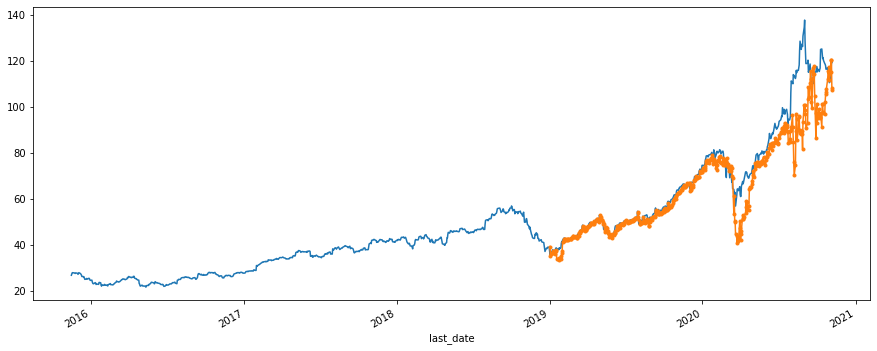

In [27]:
plt.figure(figsize=(15, 6))

y.plot(ax=plt.gca())
y_pred.plot(ax=plt.gca(), legend=None, marker=".")

In [28]:
y_pred

last_date
2019-01-02     39.152892
2019-01-03     35.226788
2019-01-04     35.732991
2019-01-07     36.196536
2019-01-08     36.664357
                 ...    
2020-11-02    115.190672
2020-11-03    120.261046
2020-11-04    120.222034
2020-11-05    108.031298
2020-11-06    107.114783
Length: 468, dtype: float64

In [29]:
y

date
2015-11-16     26.649
2015-11-17     27.205
2015-11-18     27.734
2015-11-19     27.772
2015-11-20     27.732
               ...   
2020-11-02    111.300
2020-11-03    115.390
2020-11-04    119.410
2020-11-05    119.200
2020-11-06        NaN
Name: high, Length: 1254, dtype: float64